In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
image = Image.open('Nature.jpg')

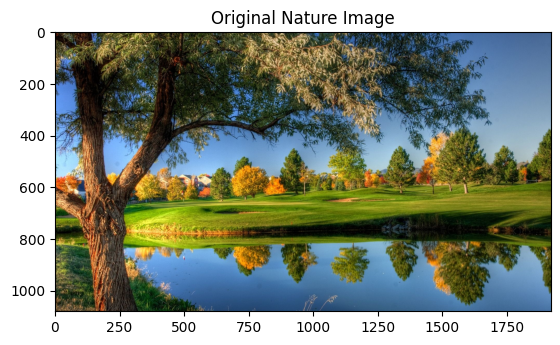

In [ ]:
plt.imshow(image)
plt.title('Original Nature Image')
plt.show()

In [ ]:
width, height = image.size
print("Image dimensions:", width, "x", height)

In [ ]:
image_array = np.array(image)
flattened_image = image_array.reshape((-1, 3))
print(flattened_image)

In [ ]:
def getCentroids(data, k):
    centroid_indices = random.sample(range(len(data)), k)
    centroids = [data[i] for i in centroid_indices]
    return centroids

In [ ]:
def assignClusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for pixel_index,pixel in enumerate(data):
        distances = []
        for centroid_index, centroid in enumerate(centroids):
            distance = np.linalg.norm(pixel - centroid)
            distances.append((centroid_index, distance))

        sorted_distances = sorted(distances, key=lambda x: x[1])
        cluster_index = sorted_distances[0][0]
        clusters[cluster_index].append((pixel_index,pixel))
    return clusters

In [ ]:
def updateCentroids(clusters):
    centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            cluster_pixels=[pixel for _, pixel in cluster]
            new_centroid = np.mean(cluster_pixels, axis=0)
            centroids.append(new_centroid.astype(int))
        else:
            centroid = np.random.randint(0, 256, size=(3,))
            centroids.append(centroid)
    return centroids


In [ ]:
def KMeans(data, k):
    centroids = getCentroids(data, k)
    converged = False
    while not converged:
        clusters = assignClusters(data, centroids)
        new_centroids = updateCentroids(clusters)
        if np.array_equal(centroids, new_centroids):
            converged = True
        else:
            centroids = new_centroids
    return clusters, centroids

In [ ]:
K=[2,3,5,10,15,20]
for k in K:
  final_clusters, final_centroids = KMeans(flattened_image, k)
  clustered_image = np.zeros_like(flattened_image)
  for cluster_index, cluster in enumerate(final_clusters):
      for pixel_index, _ in cluster:
          clustered_image[pixel_index] = final_centroids[cluster_index]

  reduced_image = Image.fromarray(clustered_image.reshape(image_array.shape).astype('uint8'), 'RGB')

  plt.imshow(reduced_image)
  plt.title('Reduced Image (K=',k,')')
  plt.show()

In [ ]:
costs = []
for k in range(1, 26):
    final_clusters, final_centroids = KMeans(flattened_image, k)

    # Calculate the within-cluster sum of squares (WCSS) as the cost
    wcss = 0
    for i, cluster in enumerate(final_clusters):
        centroid = final_centroids[i]
        for _, pixel in cluster:
            wcss += np.sum((pixel - centroid) ** 2)
    costs.append(wcss)

# Plotting the line plot for cost vs K-value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), costs, marker='o')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(range(1, 26))
plt.show()